In [237]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import torch.utils.data as data
from torchvision import transforms
import torch
import os
import argparse
import torch.nn.functional as F
from PIL import Image
from data_preprocessing.dataset_raf import RafDataSet
from data_preprocessing.dataset_affectnet import Affectdataset
from data_preprocessing.dataset_affectnet_8class import Affectdataset_8class
from sklearn.metrics import confusion_matrix
from data_preprocessing.plot_confusion_matrix import plot_confusion_matrix

from utils import *
from models.emotion_hyp import pyramid_trans_expr
from sklearn.metrics import confusion_matrix
from data_preprocessing.plot_confusion_matrix import plot_confusion_matrix
import matplotlib.pyplot as plt
from skimage import io
import os 

In [238]:
device = 'cuda' if torch.cuda.is_available() else "cpu"

In [190]:
model = pyramid_trans_expr(img_size=224, num_classes=7)

load_weight 304


In [239]:
print("Loading pretrained weights...", "checkpoint/rafdb_best.pth")
checkpoint = torch.load('checkpoint/rafdb_best.pth', map_location=torch.device('cpu'))
checkpoint = checkpoint["model_state_dict"]
model = load_pretrained_weights(model, checkpoint)

Loading pretrained weights... checkpoint/rafdb_best.pth
load_weight 1309


In [240]:
model = model.to(device)

In [241]:
testfolder ="testfolder"
test_images_path = os.listdir(testfolder)

In [242]:
test_images =[]
for image_path in test_images_path:
    image = io.imread(os.path.join(testfolder,image_path))
    # Define a transformation to convert the image to a PyTorch tensor
    data_transforms_test = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

    # Apply the transformation to the image
    tensor_image = data_transforms_test(image)
    test_image = tensor_image.unsqueeze(0)
    test_images.append(test_image)


In [243]:
results = []
with torch.no_grad():
    model.eval()
    for img in test_images:
        output, features = model(img.to(device))
        _, predict = torch.max(output, 1)
        predicted_label = predict.item()
        results.append(predicted_label)

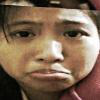

'Sadness'

In [246]:
with torch.no_grad():
    model.eval()
    img = test_images[0]
    output, features = model(img.to(device))
    _, predict = torch.max(output, 1)
    predicted_label = predict.item()

display(Image.open(os.path.join(testfolder, test_images_path[0])) ,emotion_labels[predicted_label])

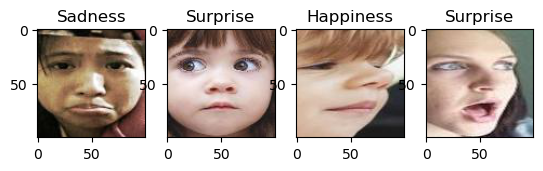

In [247]:
num = 4
fig, axs = plt.subplots(1, num)
for i, label in enumerate(results[:num]):
    path = plt.imread(os.path.join(testfolder, test_images_path[i]))
    axs[i].imshow(path)
    axs[i].set_title(emotion_labels[label])
plt.show()

In [168]:
emotion_labels = ['Surprise', 'Fear', 'Disgust', 'Happiness', 'Sadness', 'Anger', 'Neutral']

In [169]:
true_label_path= "data/raf-basic/EmoLabel/list_patition_label.txt"
with open(true_label_path ,'r') as file:
    file = file.readlines()
file = [x[:-1].split(" ") for x in file if x.find("test")==0]

In [170]:
test_path = []
for path in test_images_path:
    test_path.append(path.replace("_aligned",""))

In [171]:
for predicted_label in results:
    print(emotion_labels[predicted_label])

Sadness
Surprise
Happiness
Surprise
Sadness
Sadness
Disgust
Surprise
Happiness
Happiness
Disgust
Happiness
Happiness
Happiness
Surprise
Happiness
Anger
Disgust
Happiness
Happiness
Happiness
Sadness
Disgust
Sadness
Happiness
Happiness
Anger
Neutral
Happiness
Sadness
Sadness
Happiness
Happiness
Surprise
Surprise
Sadness
Anger
Happiness
Neutral
Happiness
Happiness
Anger
Surprise
Anger
Sadness
Happiness
Happiness
Happiness
Sadness
Happiness
Happiness
Happiness
Happiness
Sadness
Happiness
Happiness
Anger
Happiness
Fear
Happiness
Happiness
Sadness
Happiness
Happiness
Happiness
Happiness
Happiness
Happiness
Sadness
Sadness
Happiness
Happiness
Neutral
Happiness
Happiness
Sadness
Happiness
Happiness
Happiness
Sadness
Disgust
Happiness
Happiness
Surprise
Sadness
Surprise
Happiness
Sadness
Sadness
Anger
Neutral
Happiness
Happiness
Surprise
Sadness
Surprise
Happiness
Happiness
Surprise
Sadness
Neutral
Surprise
Sadness
Neutral
Happiness
Happiness
Sadness
Happiness
Happiness
Happiness
Happiness
Happ

In [172]:
print("---------------------------------------------------------------------------------------------")
print("  Test File     |  Test Label  | Predicted Label |   True Emotion  \t |  Predicted Emotion")
for path ,result in zip(test_path,results):
    for f_path in file:
        if path == f_path[0]:
            print("---------------------------------------------------------------------------------------------")
            print(f"{path}   |     {int(f_path[1])-1}        |\t {result}       |\t {emotion_labels[result]}  \t |\t {emotion_labels[int(f_path[1])-1]}")

---------------------------------------------------------------------------------------------
  Test File     |  Test Label  | Predicted Label |   True Emotion  	 |  Predicted Emotion
---------------------------------------------------------------------------------------------
test_0001.jpg   |     4        |	 4       |	 Sadness  	 |	 Sadness
---------------------------------------------------------------------------------------------
test_0002.jpg   |     0        |	 0       |	 Surprise  	 |	 Surprise
---------------------------------------------------------------------------------------------
test_0003.jpg   |     3        |	 3       |	 Happiness  	 |	 Happiness
---------------------------------------------------------------------------------------------
test_0004.jpg   |     0        |	 0       |	 Surprise  	 |	 Surprise
---------------------------------------------------------------------------------------------
test_0005.jpg   |     4        |	 4       |	 Sadness  	 |	 Sadness
---

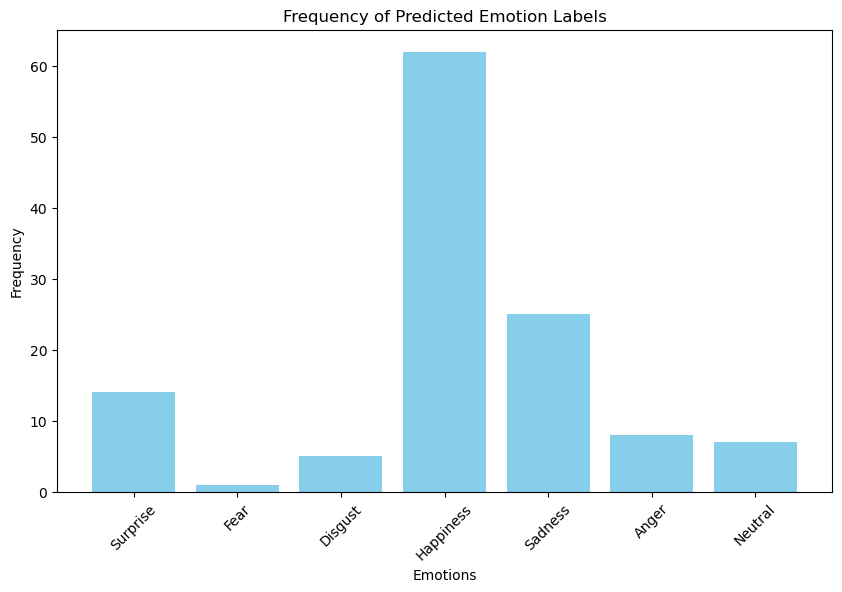

In [173]:
import matplotlib.pyplot as plt

# Assuming emotion_labels and results are already defined as per your script

# Count the occurrences of each emotion label
emotion_counts = {label: results.count(index) for index, label in enumerate(emotion_labels)}

# Extract labels and counts for plotting
labels = list(emotion_counts.keys())
counts = list(emotion_counts.values())

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Emotions')
plt.ylabel('Frequency')
plt.title('Frequency of Predicted Emotion Labels')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


In [174]:
len(file) , len(results) ,len(test_path)

(3068, 122, 122)

In [175]:
true_labels=[]
predicted_labels = []
for result , path in zip(results,test_path):
        for f_path in file:
            if path == f_path[0]:
                true_labels.append(int(f_path[1])-1)
                predicted_labels.append(result)
                #print(path,result,f_path[0],int(f_path[1])-1)

In [176]:
len(predicted_labels),len(true_labels)

(122, 122)

In [177]:
predicted_labels = torch.tensor(predicted_labels)
true_labels = torch.tensor(true_labels)

In [178]:
correct_or_not = torch.eq(predicted_labels, true_labels)

In [179]:
acc= correct_or_not.sum()/len(correct_or_not)

In [180]:
acc = np.around(acc.numpy(), 4)

In [181]:
cm = confusion_matrix(true_labels, predicted_labels)

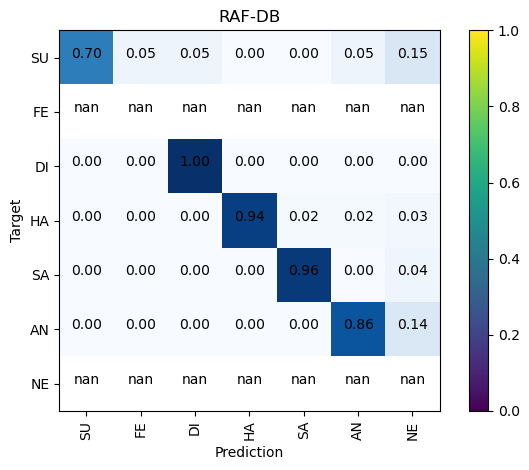

In [182]:
cm = np.array(cm)
labels_name = ['SU', 'FE', 'DI', 'HA', 'SA', 'AN', "NE"]  #
plot_confusion_matrix(cm, labels_name, 'RAF-DB', acc)

In [183]:
cm

array([[14,  1,  1,  0,  0,  1,  3],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0],
       [ 0,  0,  0, 62,  1,  1,  2],
       [ 0,  0,  0,  0, 24,  0,  1],
       [ 0,  0,  0,  0,  0,  6,  1],
       [ 0,  0,  0,  0,  0,  0,  0]], dtype=int64)

In [184]:
set(true_labels.tolist())

{0, 2, 3, 4, 5}